In [2]:
# Loading of all necessary imports
# Using Seaborn instead of matplotlib for most plots as it has more powerful plots out of the box
import pandas as pd
from os import listdir
from os.path import join
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import seaborn as sns
import numpy as np
from matplotlib import colors
from datetime import datetime 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
from statsmodels.regression.mixed_linear_model import MixedLMParams

In [3]:
# Local source of data
data_path = "../data/"
sns.set_theme()

In [31]:
participant_path = join(data_path, "processed", "participant_data.csv.gz")
df_participants = pd.read_csv(participant_path, compression='gzip')
df_participants.set_index("participant_id", inplace=True)


daily_path = join(data_path, 'processed', 'daily_data.csv.gz')
df_daily = pd.read_csv(daily_path, compression='gzip')



df_subset = df_daily[['sleepd', 'participant_id', 'NumberSteps', 'Fat Burn_minutes', 'Peak_minutes', 'Cardio_minutes', 'Out of Range_minutes', 'work_status']].reset_index().copy()
df_subset['Active_Minutes'] = df_subset['Cardio_minutes'] + df_subset['Peak_minutes'] + df_subset['Fat Burn_minutes'] 
df_subset['WearTime'] = df_subset['Active_Minutes'] + df_subset['Out of Range_minutes']
df_subset = df_subset[df_subset['WearTime'] >= 720]
df_test = df_subset.merge(df_participants, how='inner', on='participant_id', suffixes=(None, '_survey'))
df_test['work_status'] = df_test['work_status'] == 'yes'
df = df_test[['sleepd', 'participant_id', 'NumberSteps', 'Active_Minutes', 'shift', 'gender', 'age', 'hours', 'work_status']].dropna()
df['age'] = df['age'] /5 -5
df['age'] = df['age'].apply(lambda x: 0 if x < 0 else x)

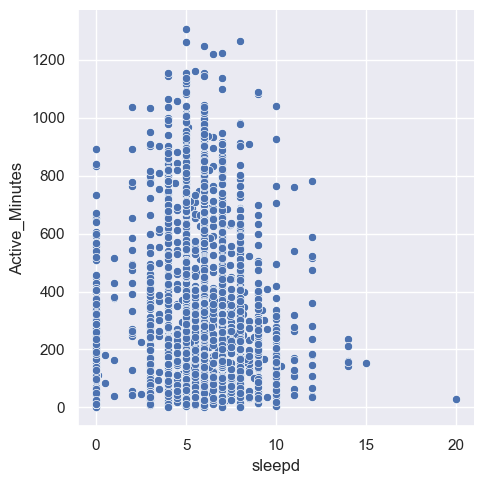

In [32]:
sns.relplot(x=df['sleepd'], y=df['Active_Minutes'])

In [33]:
df

,sleepd,participant_id,NumberSteps,Active_Minutes,shift,gender,age,hours,work_status
0,8.0,02581754-36cd-4b23-85ea-bf995c6dec83,18945,230.0,2.0,1,0.0,B,False
1,5.0,02581754-36cd-4b23-85ea-bf995c6dec83,19362,220.0,2.0,1,0.0,B,False
3,8.0,02581754-36cd-4b23-85ea-bf995c6dec83,22475,384.0,2.0,1,0.0,B,False
7,3.0,02581754-36cd-4b23-85ea-bf995c6dec83,26315,343.0,2.0,1,0.0,B,False
12,8.0,02581754-36cd-4b23-85ea-bf995c6dec83,20685,368.0,2.0,1,0.0,B,False
...,...,...,...,...,...,...,...,...,...
10949,10.0,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,6442,1041.0,1.0,2,5.0,B,False
10951,5.0,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,8069,1007.0,1.0,2,5.0,B,False
10952,7.0,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,2783,852.0,1.0,2,5.0,B,False
10953,12.0,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,4983,524.0,1.0,2,5.0,B,False


In [34]:
model = smf.mixedlm('Active_Minutes ~ sleepd + age + C(gender) + C(shift) + C(hours)', groups=df['participant_id'], data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
================================================================
Model:              MixedLM  Dependent Variable:  Active_Minutes
No. Observations:   4240     Method:              REML          
No. Groups:         195      Scale:               16323.1814    
Min. group size:    1        Log-Likelihood:      -26914.3577   
Max. group size:    35       Converged:           Yes           
Mean group size:    21.7                                        
----------------------------------------------------------------
                  Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
----------------------------------------------------------------
Intercept         297.095   35.575  8.351 0.000  227.369 366.820
C(gender)[T.2]    -28.576   29.863 -0.957 0.339  -87.106  29.955
C(shift)[T.2.0]   -54.459   28.196 -1.931 0.053 -109.722   0.805
C(hours)[T.B]      11.260   28.431  0.396 0.692  -44.462  66.983
sleepd            -10.226    1.162 -8.799 0.000  -12.504  -7.948
age                38.927    7.933  4.907 0.000   23.379  54.475
Group Var       33362.906   28.616                              
================================================================

"""

In [35]:
for table in result.summary().tables:
    print(table.to_latex())

\begin{tabular}{lllll}
\toprule
{} &                  0 &        1 &                    2 &               3 \\
\midrule
0 &             Model: &  MixedLM &  Dependent Variable: &  Active\_Minutes \\
1 &  No. Observations: &     4240 &              Method: &            REML \\
2 &        No. Groups: &      195 &               Scale: &      16323.1814 \\
3 &   Min. group size: &        1 &      Log-Likelihood: &     -26914.3577 \\
4 &   Max. group size: &       35 &           Converged: &             Yes \\
5 &   Mean group size: &     21.7 &                      &                 \\
\bottomrule
\end{tabular}

\begin{tabular}{lllllll}
\toprule
{} &      Coef. & Std.Err. &       z &  P>|z| &    [0.025 &   0.975] \\
\midrule
Intercept       &    297.095 &   35.575 &   8.351 &  0.000 &   227.369 &  366.820 \\
C(gender)[T.2]  &    -28.576 &   29.863 &  -0.957 &  0.339 &   -87.106 &   29.955 \\
C(shift)[T.2.0] &    -54.459 &   28.196 &  -1.931 &  0.053 &  -109.722 &    0.805 \\
C(hours)[T.B] 

C:\Users\bgrem\AppData\Local\Temp\ipykernel_15036\3406381553.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex())


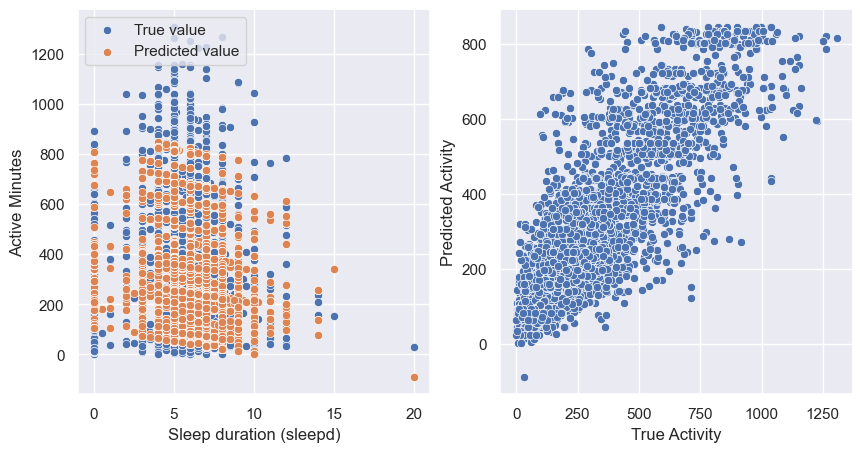

In [36]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
img = sns.scatterplot(ax=axes[0], x=df['sleepd'], y=df['Active_Minutes'])
img = sns.scatterplot(ax=axes[0], x=df['sleepd'], y=result.fittedvalues)
img.set(xlabel='Sleep duration (sleepd)', ylabel='Active Minutes')
img.legend(loc='upper left', labels=['True value', 'Predicted value'])

img2 = sns.scatterplot(ax=axes[1], y=result.fittedvalues, x=df['Active_Minutes'])
img2.set(xlabel='True Activity', ylabel='Predicted Activity')
fig.savefig('../sleepActivityMinutes.jpg')